# Data Analyst Project    

In [137]:
import pandas as pd
import matplotlib.pyplot as ply
%matplotlib inline
import seaborn as sb
import numpy as np
import csv

In [60]:
#Read csv or excel file from pandas
#df= pd.read_csv(" ")        #This not working then 
df_csv= open("file path")       #Used this method store in variable
df=pd.read_csv(df_csv)                                                                      # df= my csv file

In [61]:
df.head(5)              #variable.head(define how many column want)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [62]:
df.shape            #Shape show rows and column in file          

(11251, 15)

In [98]:
df.info()           #Info()  used for all major information about data

<class 'pandas.core.frame.DataFrame'>
Index: 11231 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11231 non-null  int64  
 1   Cust_name         11231 non-null  object 
 2   Product_ID        11231 non-null  object 
 3   Gender            11231 non-null  object 
 4   Age Group         11231 non-null  object 
 5   Age               11231 non-null  int64  
 6   State             11231 non-null  object 
 7   Zone              11231 non-null  object 
 8   Occupation        11231 non-null  object 
 9   Product_Category  11231 non-null  object 
 10  Orders            11231 non-null  int64  
 11  Amount            11231 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 1.1+ MB


In [74]:
#Cleaning process using pandas
# First Remove duplicate from data
df.drop_duplicates(subset=None,keep='first',inplace=True)

(11243, 15)

In [77]:
# Secound Remove last 2 column (13 & 14 column)
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [78]:
df.shape

(11243, 13)

In [79]:
# Third Find NULL and delete
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [86]:
#remove null from amount
df.dropna(inplace=True)         #inplace= True used for overite change or True/False
pd.isnull(df).sum()             # Or used pd.notnull(df).sum()   for NOTNULL

(11231, 13)

In [91]:
# Fifth check all data type and correct if is not in correct data types for plotting
df.dtypes                  # Check data type of all column

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [102]:
df['Amount']=df['Amount'].astype('int64')

In [103]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int64
dtype: object

# Data Analysis
Gender

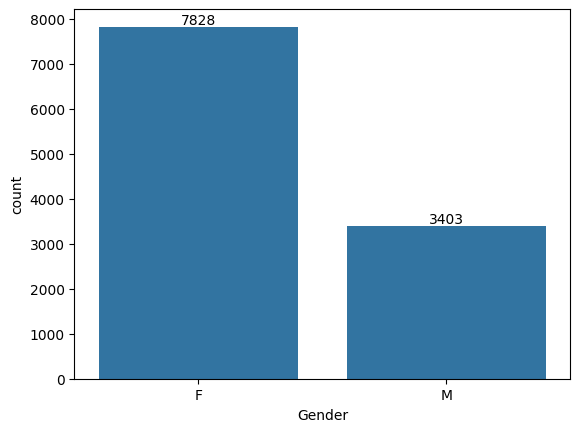

In [139]:

axe = sb.countplot(x = 'Gender',data = df)          # Used Seaborn library for graph not show values in bar chart

for bar in axe.containers:
    axe.bar_label(bar)

Amount by Zone

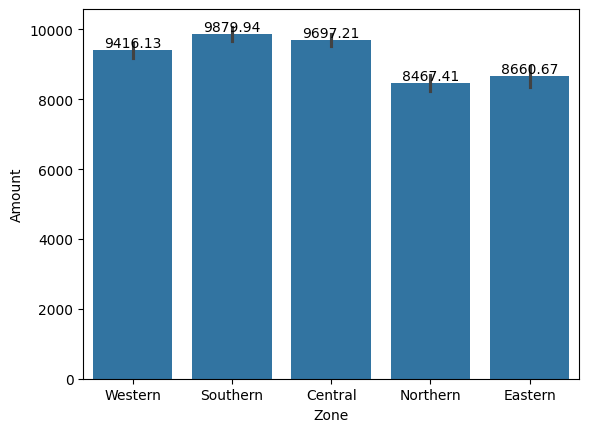

In [145]:
axe = sb.barplot(y = 'Amount',x='Zone', data = df)          # Used Seaborn library for graph not show values in bar chart

for bar in axe.containers:
    axe.bar_label(bar)

AGE GROUP

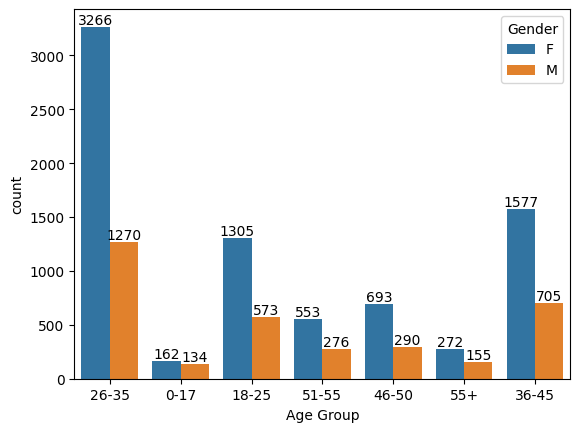

In [148]:
axe= sb.countplot(x='Age Group',hue='Gender',data=df)

for bar in axe.containers:
    axe.bar_label(bar)

<Axes: xlabel='Age Group', ylabel='Amount'>

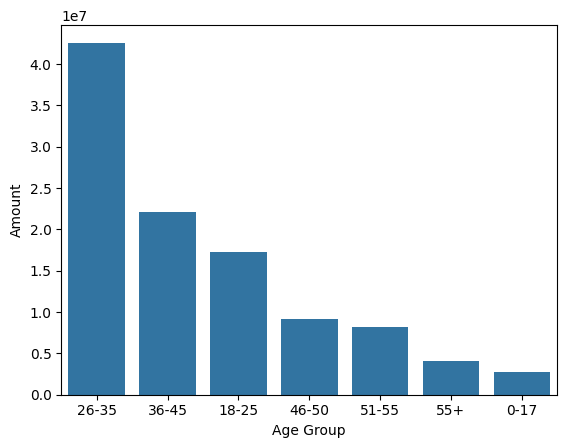

In [149]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sb.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)